In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [5]:
# import csv file
als_data = pd.read_csv('als_data.csv')

# print the first 5 rows of the dataframe
als_data.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [6]:
# List of columns for the analysis
als_relevant_columns = [
    'Age_mean', 
    'ALSFRS_slope', 
    'ALSFRS_Total_max', 
    'ALSFRS_Total_median', 
    'ALSFRS_Total_min'
]

# Filter the dataset
als_filtered_data = als_data[als_relevant_columns]

# Print head
als_filtered_data.head()


,Age_mean,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min
0,65,-0.965608,30,28.0,22
1,48,-0.921717,37,33.0,21
2,38,-0.914787,24,14.0,10
3,63,-0.598361,30,29.0,24
4,63,-0.444039,32,27.5,20


In [7]:
scaler = StandardScaler()

# Fit and transform
als_scaled_data = scaler.fit_transform(als_filtered_data)

# Convert the scaled data
als_scaled_data_df = pd.DataFrame(als_scaled_data, columns=als_filtered_data.columns)

# Print head
als_scaled_data_df.head()

,Age_mean,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min
0,0.917137,-0.381450,-0.318520,0.134960,0.247368
1,-0.574879,-0.310907,0.998995,0.888863,0.130839
2,-1.452535,-0.299769,-1.447819,-1.975969,-1.150976
3,0.741606,0.208801,-0.318520,0.285741,0.480425
4,0.741606,0.456831,0.057913,0.059570,0.014311


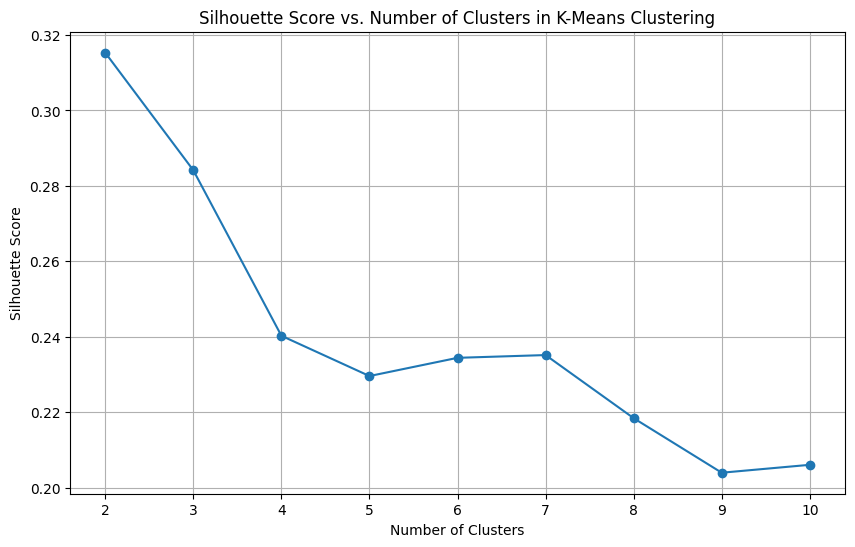

In [9]:
# Range of clusters
cluster_range = range(2, 11)

# List to hold silhouette scores
silhouette_scores = []

# Calculate silhouette scores for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(als_scaled_data_df)
    silhouette_avg = silhouette_score(als_scaled_data_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores versus number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters in K-Means Clustering')
plt.grid(True)
plt.show()

The best number of clusters to use is 2. It has the highest score and the next number of clusters, 3, the score starts to drop quickly.

In [13]:
# Initialize the K-means model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, max_iter=300, n_init=10)

# Fit the model to the entire scaled dataset
cluster_labels = kmeans.fit_predict(als_scaled_data_df)

# Add the cluster labels to the scaled dataset
als_scaled_data_df['Cluster'] = cluster_labels

als_scaled_data_df.head()

,Age_mean,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,Cluster
0,0.917137,-0.381450,-0.318520,0.134960,0.247368,0
1,-0.574879,-0.310907,0.998995,0.888863,0.130839,0
2,-1.452535,-0.299769,-1.447819,-1.975969,-1.150976,1
3,0.741606,0.208801,-0.318520,0.285741,0.480425,0
4,0.741606,0.456831,0.057913,0.059570,0.014311,0


In [15]:
# Initialize the PCA
pca = PCA(n_components=2)

# Fit and transform
pca_components = pca.fit_transform(als_scaled_data_df.drop(columns=['Cluster']))

# Create a df with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Add labels
pca_df['Cluster'] = als_scaled_data_df['Cluster'].values

# Print head
pca_df.head()


,PCA1,PCA2,Cluster
0,0.015650,0.497343,0
1,-0.977483,0.578580,0
2,2.680376,-1.101394,1
3,-0.368805,-0.042530,0
4,-0.239807,-0.024131,0


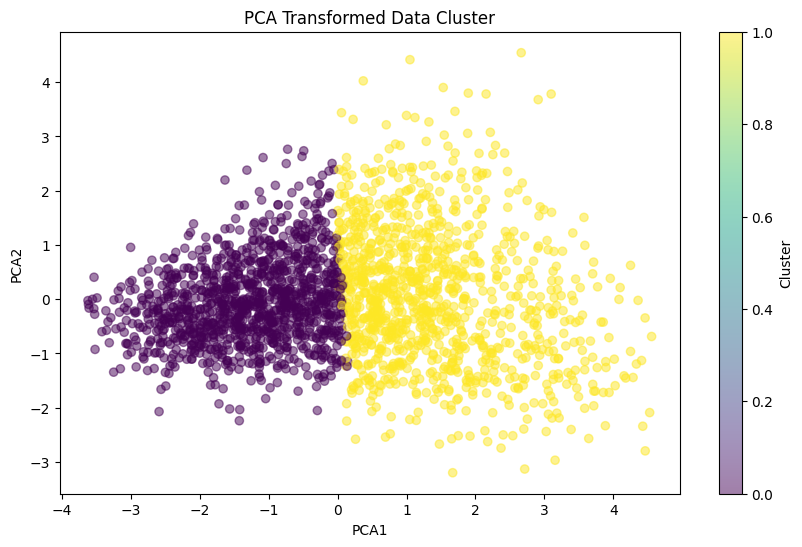

In [17]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Transformed Data Cluster')
plt.colorbar(scatter, label='Cluster')
plt.show()

The analysis involved filtering relevant ALS data, scaling it, and applying K-means clustering with an optimal number of 2 clusters. A PCA transformation was performed and reduced the data to two principal components. The scatter plot revealed distinct grouping and indicated that the ALS patient data can be clustered into two groups. This suggests the presence of two distinct patterns.